## Aim : To Explore Adult Cences Data and Find Useful Information along the way

In [199]:
# importing the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [200]:
# importing the dataset
df = pd.read_csv('adult.csv')

## EDA 1

In [201]:
# shape of data
df.shape

(48842, 15)

In [202]:
# columns of data
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [203]:
# data info and dtype
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [204]:
# describing numeric features
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [205]:
# Describing non-numeric features
df.describe(exclude=np.number)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [206]:
# Missing Values
df.isnull().values.any()

False

## Summary of EDA 1
- data has approx 50K rows and 50 columns
- Data contain numeric and non-numeric features
- Not contain missing values

## EDA 2

In [207]:
# mapping income to 0 and 1 where 0: <=50K and 1 : >50K
income = {'<=50K': 0, ">50K":1}
df['income'] = df['income'].map(income)

([<matplotlib.patches.Wedge at 0x2910c8fa4f0>,
 [Text(-1.6071250037398477, 1.5023811841054837, '<50K'),
  Text(1.6071249334083066, -1.5023812593404333, '>50K')],
 [Text(-0.8766136384035532, 0.8194806458757183, '76.1%'),
  Text(0.8766136000408944, -0.8194806869129635, '23.9%')])

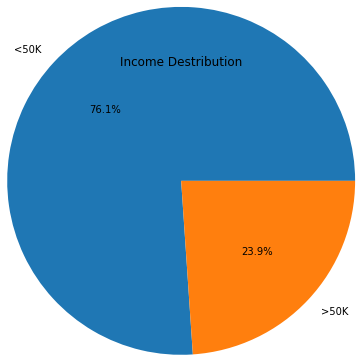

In [208]:
income = df.income.value_counts()
plt.title('Income Destribution')
plt.pie(income, labels=['<50K', '>50K'],radius=2,autopct='%1.1f%%')

**Age Destribution**

<AxesSubplot:ylabel='Frequency'>

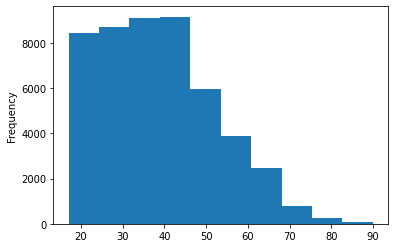

In [209]:
df['age'].plot.hist()

<AxesSubplot:xlabel='workclass', ylabel='count'>

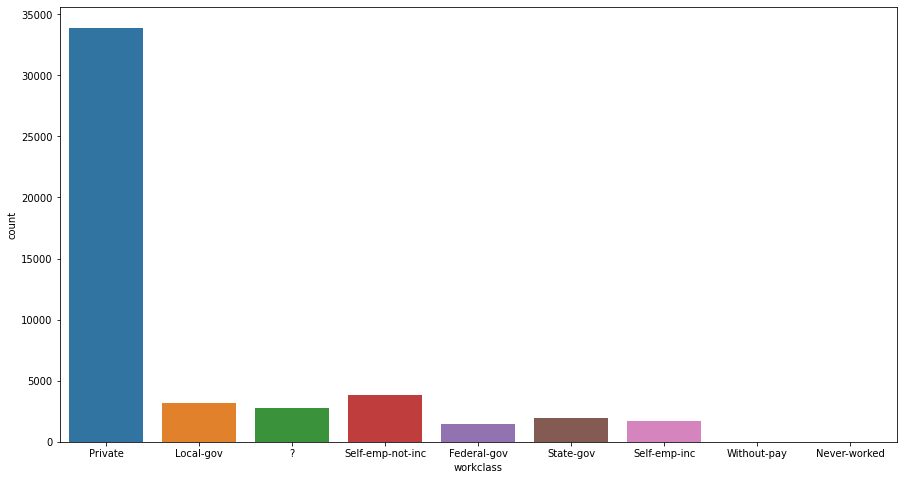

In [210]:
plt.figure(figsize=(15,8))
sns.countplot('workclass', data=df)

**workclass contain '?'**<br>
*I have checked data description and found thet '?' represent missing values*<br>
*To Deal with first I will convert '?' to 'nan' and impute with suitable values*

In [211]:
df = df.replace('?', np.nan)

In [212]:
df.isnull().sum().sort_values(ascending=False)

occupation         2809
workclass          2799
native-country      857
age                   0
fnlwgt                0
education             0
educational-num       0
marital-status        0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
income                0
dtype: int64

**'Occupation','Workclass' and native country contain missing values and I will impute it with mode**

In [213]:
for c in ['occupation','workclass','native-country']:
    df[c].fillna(df[c].mode()[0], inplace=True)

In [214]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**Workclass**

<AxesSubplot:xlabel='workclass', ylabel='count'>

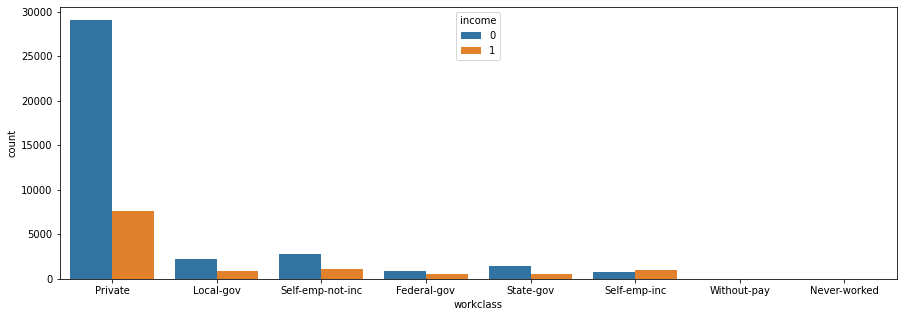

In [215]:
plt.figure(figsize=(15,5))
sns.countplot('workclass', data=df, hue='income')

<AxesSubplot:xlabel='education', ylabel='count'>

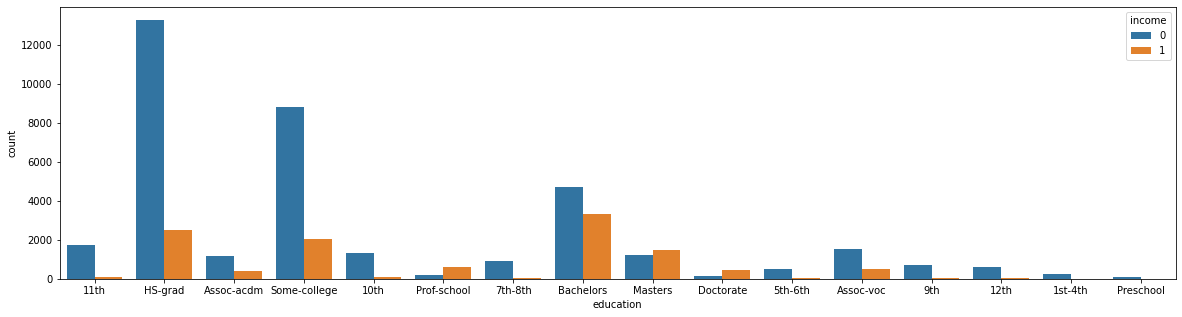

In [216]:
plt.figure(figsize=(20,5))
sns.countplot('education', data=df, hue='income')

<AxesSubplot:xlabel='marital-status', ylabel='count'>

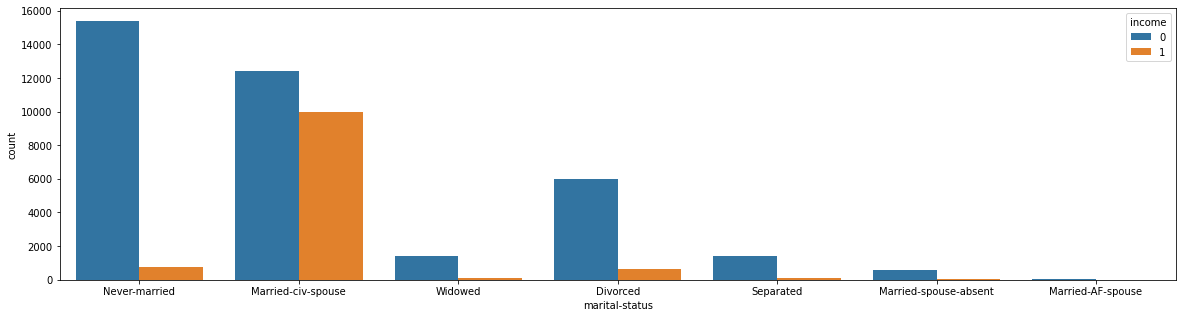

In [217]:
plt.figure(figsize=(20,5))
sns.countplot('marital-status', data=df, hue='income')

<AxesSubplot:xlabel='occupation', ylabel='count'>

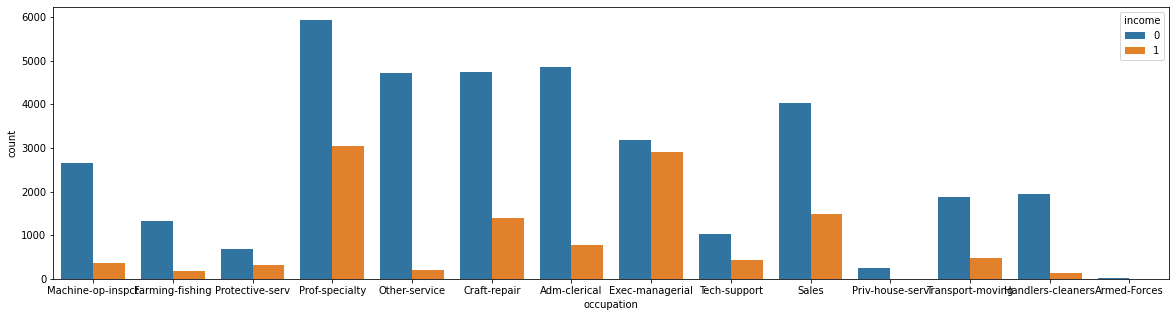

In [218]:
plt.figure(figsize=(20,5))
sns.countplot('occupation', data=df, hue='income')

<AxesSubplot:xlabel='relationship', ylabel='count'>

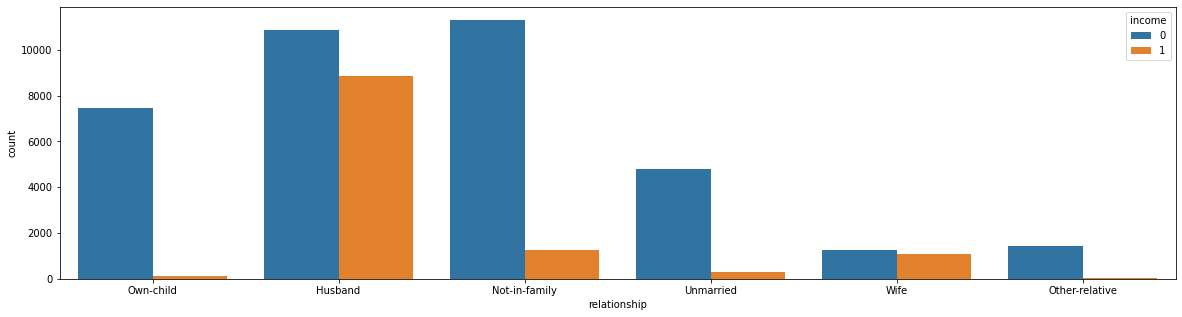

In [219]:
plt.figure(figsize=(20,5))
sns.countplot('relationship', data=df, hue='income')

<AxesSubplot:xlabel='race', ylabel='count'>

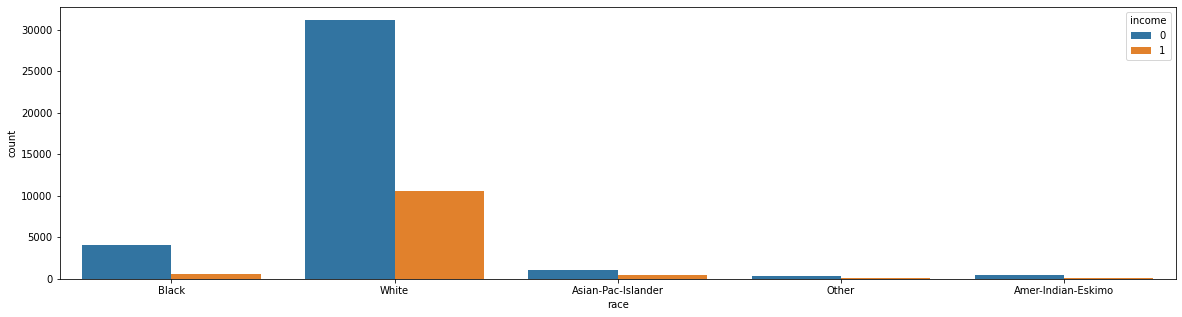

In [220]:
plt.figure(figsize=(20,5))
sns.countplot('race', data=df, hue='income')

<AxesSubplot:xlabel='gender', ylabel='count'>

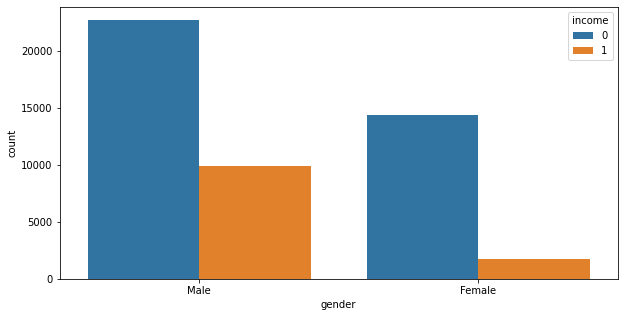

In [221]:
plt.figure(figsize=(10,5))
sns.countplot('gender', data=df, hue='income')

<AxesSubplot:xlabel='native-country', ylabel='count'>

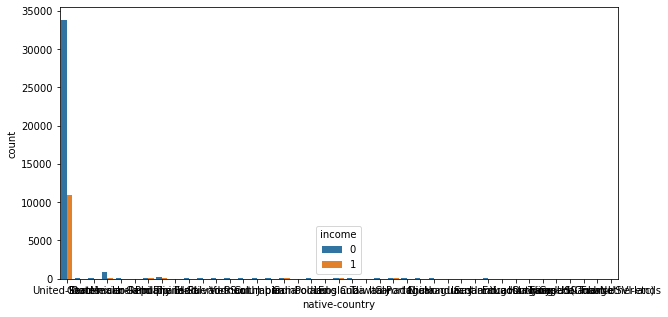

In [222]:
plt.figure(figsize=(10,5))
sns.countplot('native-country', data=df, hue='income')

**mapping native country to "USA" and 'Other'**

In [223]:
df['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [224]:
df.loc[df['native-country'] == 'United-States','native-country'] = 'USA'
df.loc[df['native-country'] != 'USA','native-country'] = 'Other'

In [225]:
df['native-country'].value_counts()

USA      44689
Other     4153
Name: native-country, dtype: int64

<AxesSubplot:xlabel='native-country', ylabel='count'>

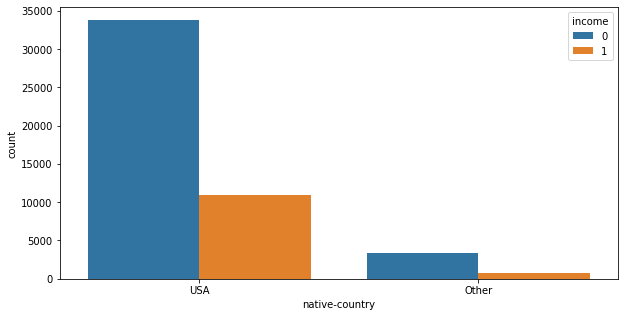

In [226]:
plt.figure(figsize=(10,5))
sns.countplot('native-country', data=df, hue='income')

## Summary of EDA 2
-